In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


sns.set_theme()

## Data load

In [2]:
budget_raw = pd.read_csv('../data/preprocessed/dotacie_ours_final.csv')
graduates_raw = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
teachers_degrees_raw = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')

In [3]:
budget_raw.columns = ['year', 'uni', 'budget', 'salary_budget', 'students_budget', 'students', 'students_full_time_budget', 'dorm_cap', 'dorm_students', 'dorm_budget', 'pub_07711', 'pub_07712', 'inflation_rate', 'budget_ia']
budget_raw['other_budget'] = budget_raw['budget'] - budget_raw['students_budget'] - budget_raw['salary_budget'] - budget_raw['dorm_budget']
budget_raw.head(5)

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,inflation_rate,budget_ia,other_budget
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,1.0,77024560.0,32810476.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,1.0,21034252.0,8953305.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,1.0,17921956.0,6744846.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,1.0,6960463.0,2769540.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,1.0,9082561.0,4117419.0


In [4]:
graduates_raw.columns = ['uni', 'year', 'first_full_time', 'first_part_time', 'third_full_time', 'third_part_time', 'third_external_inst']
graduates_raw.head(5)

,uni,year,first_full_time,first_part_time,third_full_time,third_part_time,third_external_inst
0,AU,2009,189,0,6,1,0
1,AU,2010,199,0,7,1,0
2,AU,2011,200,0,8,3,0
3,AU,2012,196,0,12,4,0
4,AU,2013,173,0,7,8,0


In [5]:
teachers_degrees_raw.columns = ['uni', 'year', 'teacher_type', 'employment_type', 'drsc', 'phd', 'other', 'total']
teachers_degrees_raw.head(5)

,uni,year,teacher_type,employment_type,drsc,phd,other,total
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0


## Overall budget change

In [6]:
budget_totals = (
    pd.concat(
        [
            budget_raw.groupby('year')['budget'].sum().to_frame('budget'),
            budget_raw.groupby('year')['salary_budget'].sum().to_frame('salary_budget'),
            budget_raw.groupby('year')['students_budget'].sum().to_frame('students_budget'),
            budget_raw.groupby('year')['dorm_budget'].sum().to_frame('dorm_budget'),
            budget_raw.groupby('year')['other_budget'].sum().to_frame('other_budget'),
        ], axis = 1)
        .reset_index()
)
budget_totals['salary_budget_share'] = budget_totals['salary_budget'] / budget_totals['budget']
budget_totals['students_budget_share'] = budget_totals['students_budget'] / budget_totals['budget']
budget_totals['dorm_budget_share'] = budget_totals['dorm_budget'] / budget_totals['budget']
budget_totals['other_budget_share'] = budget_totals['other_budget'] / budget_totals['budget']
budget_totals.head(5)


,year,budget,salary_budget,students_budget,dorm_budget,other_budget,salary_budget_share,students_budget_share,dorm_budget_share,other_budget_share
0,2009,3.829316e+08,172547633,50274862,3352848.0,1.482603e+08,0.450596,0.131289,0.008756,0.387172
1,2010,3.941945e+08,177193101,45552844,3326000.0,1.631544e+08,0.449507,0.115559,0.008437,0.413893
2,2011,3.925506e+08,122195435,47744810,3288800.0,2.193216e+08,0.311286,0.121627,0.008378,0.558709
3,2012,3.091253e+08,126633305,52043774,3288800.0,1.271595e+08,0.409650,0.168358,0.010639,0.411352
4,2013,4.103603e+08,126633305,53252028,3425888.0,2.270491e+08,0.308591,0.129769,0.008348,0.553292


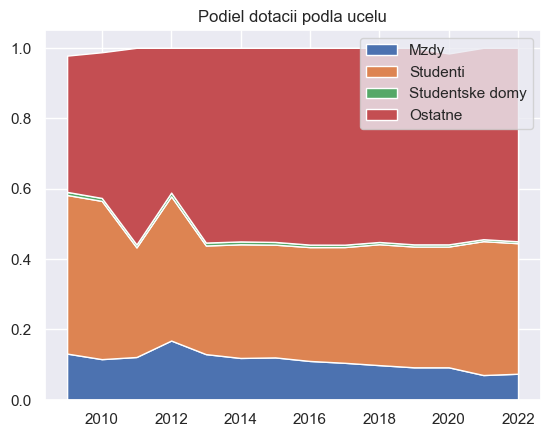

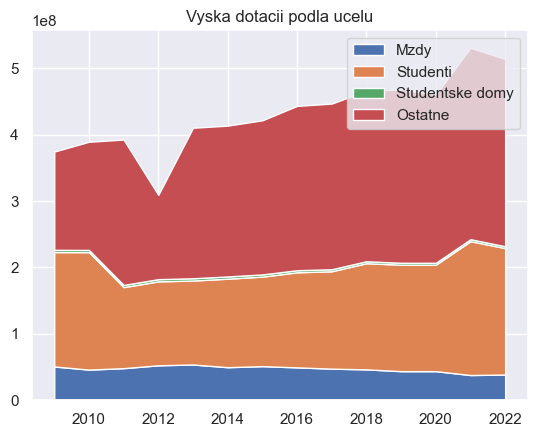

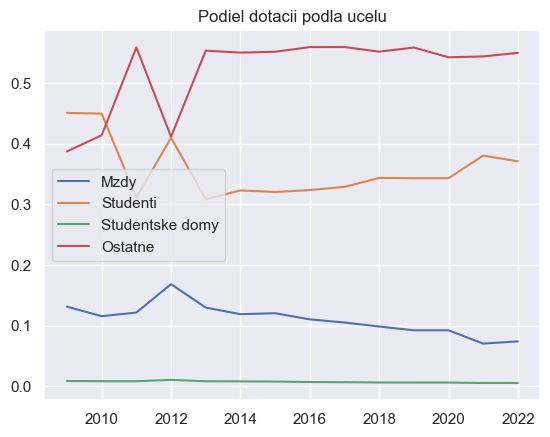

In [7]:
stacked_salary_chart_y = budget_totals[['students_budget_share', 'salary_budget_share', 'dorm_budget_share', 'other_budget_share']].values.T
stacked_salary_chart_y_abs = budget_totals[['students_budget', 'salary_budget', 'dorm_budget', 'other_budget']].values.T
# # Plot
plt.stackplot(budget_totals['year'],stacked_salary_chart_y, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

plt.stackplot(budget_totals['year'],stacked_salary_chart_y_abs, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Vyska dotacii podla ucelu')
plt.legend()
plt.show()


plt.plot(budget_totals['year'],stacked_salary_chart_y.T, label=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

In [8]:
teachers_degrees = teachers_degrees_raw.copy()
teachers_degrees['employment_type'].value_counts()
teachers_degrees['weight'] = teachers_degrees.apply(lambda x: 1 if x.employment_type == 'full-time' else 0.5, axis = 1)
teachers_degrees['total'] *= teachers_degrees['weight']

In [9]:
teachers_types = pd.pivot_table(teachers_degrees.groupby(['uni', 'year', 'teacher_type'])['total'].sum().to_frame('teachers').reset_index(), index = ['uni', 'year'], columns='teacher_type', fill_value=0).reset_index()
teachers_types.columns = ['uni', 'year', 'asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']
teachers_types = teachers_types.merge(budget_raw[['uni', 'year', 'salary_budget']], on = ['uni', 'year'], how = 'left')
teachers_types = teachers_types.dropna()

teachers_types['ucitelia_spolu'] = sum([teachers_types[col] for col in ['asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']])
display(teachers_types)
teachers_types.to_csv('../data/preprocessed/teachers_types_simplified.csv', index = False)

,uni,year,asistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor,salary_budget,ucitelia_spolu
0,AU,2009,11.5,14.5,0,0.0,44.0,33.0,1448749,103.0
1,AU,2010,5.0,18.0,0,0.0,48.5,34.0,1479444,105.5
2,AU,2011,7.0,18.5,0,0.0,55.5,34.5,1147907,115.5
3,AU,2012,5.5,22.0,0,0.0,52.5,35.0,1187816,115.0
4,AU,2013,7.0,24.0,0,0.0,54.0,35.5,1223047,120.5
...,...,...,...,...,...,...,...,...,...,...
275,ŽU,2018,9.5,148.0,0,27.0,312.5,86.0,10899800,583.0
276,ŽU,2019,11.0,149.0,0,26.5,300.5,90.0,10994390,577.0
277,ŽU,2020,10.0,151.0,0,23.5,296.0,84.0,10994390,564.5
278,ŽU,2021,9.0,159.5,0,24.0,260.5,87.0,13183264,540.0


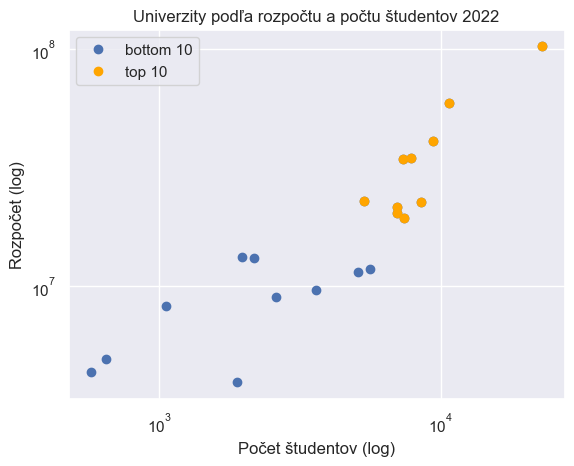

In [10]:
plt.plot(budget_raw.query('year == 2022')['students'], budget_raw.query('year == 2019')['budget'], 'o')
plt.loglog()
pass

top10 = budget_raw.query('year==2022').sort_values('budget', ascending=False).head(10)['uni'].unique()
budget = budget_raw.query('uni in @top10')
plt.plot(budget.query('year == 2022')['students'], budget.query('year == 2019')['budget'], 'o', color = 'orange')
plt.title('Univerzity podľa rozpočtu a počtu študentov 2022')
plt.xlabel('Počet študentov (log)')
plt.ylabel('Rozpočet (log)')
plt.legend(['bottom 10', 'top 10'])
plt.show()

## Regresna analyza

In [11]:
from sklearn.linear_model import LinearRegression

Nizsie je vztah medzi poctom studentov a ucitelov jednotlivych univerzit v priebehu rokov.
Kazdy graf zachytava jednu fakultu v obdobi r. 2014-2022.
Body na grafe su jednotlive roky, pricom sme body pospajali sipkami, aby sme videli aj evoluciu, ako sa stav menil v case.
Cierna priamka je linerna regresna priamka vysvetlujuca pocet ucitelov v zavislosti od poctu studentov.

Vidime, ze na vacsine univerzit je tento vztah lokalne linearny, korelacne koeficienty su az na niekolko vynimiek (PU 0.29, TUKE 0.59, UPJS -0.65) vysoke (viac ako 0.8 v absolutnej hodnote).
Jedine dve univerzity s negativnym vztahom su UK a UPJS, na oboch skolach v priebehu rokov klesa pocet studentov a zaroven rastie pocet ucitelov.
Ostatne sledovane univerzity maju velmi podobny vyvoj, sucasne klesa pocet studentov aj ucitelov.
Touto vizualizaciou vyjadrujeme len korelaciu, nie kauzalitu, no kedze vidime celu krivku vyvoja, z grafov sa zda, ze prebieha korekcia - po sebe nasledujuce body (roky) su casto striedavo nad a pod krivkou,
takze interpretacia by mohla byt, ze jedna velicina "reaguje" na zmenu druhej.

,uni,corr,coef,intercept
0,EU,0.970,0.041,141.3
1,TUKE,0.599,0.017,583.4
2,SPU,0.945,0.014,330.4
3,UK,-0.956,-0.044,3251.7
4,UKF,0.829,0.015,386.3
5,PU,0.289,0.008,472.5
6,UMB,0.844,0.023,300.9
7,UPJŠ,-0.652,-0.074,1280.3
8,STU,0.974,0.031,566.7
9,ŽU,0.961,0.023,375.1


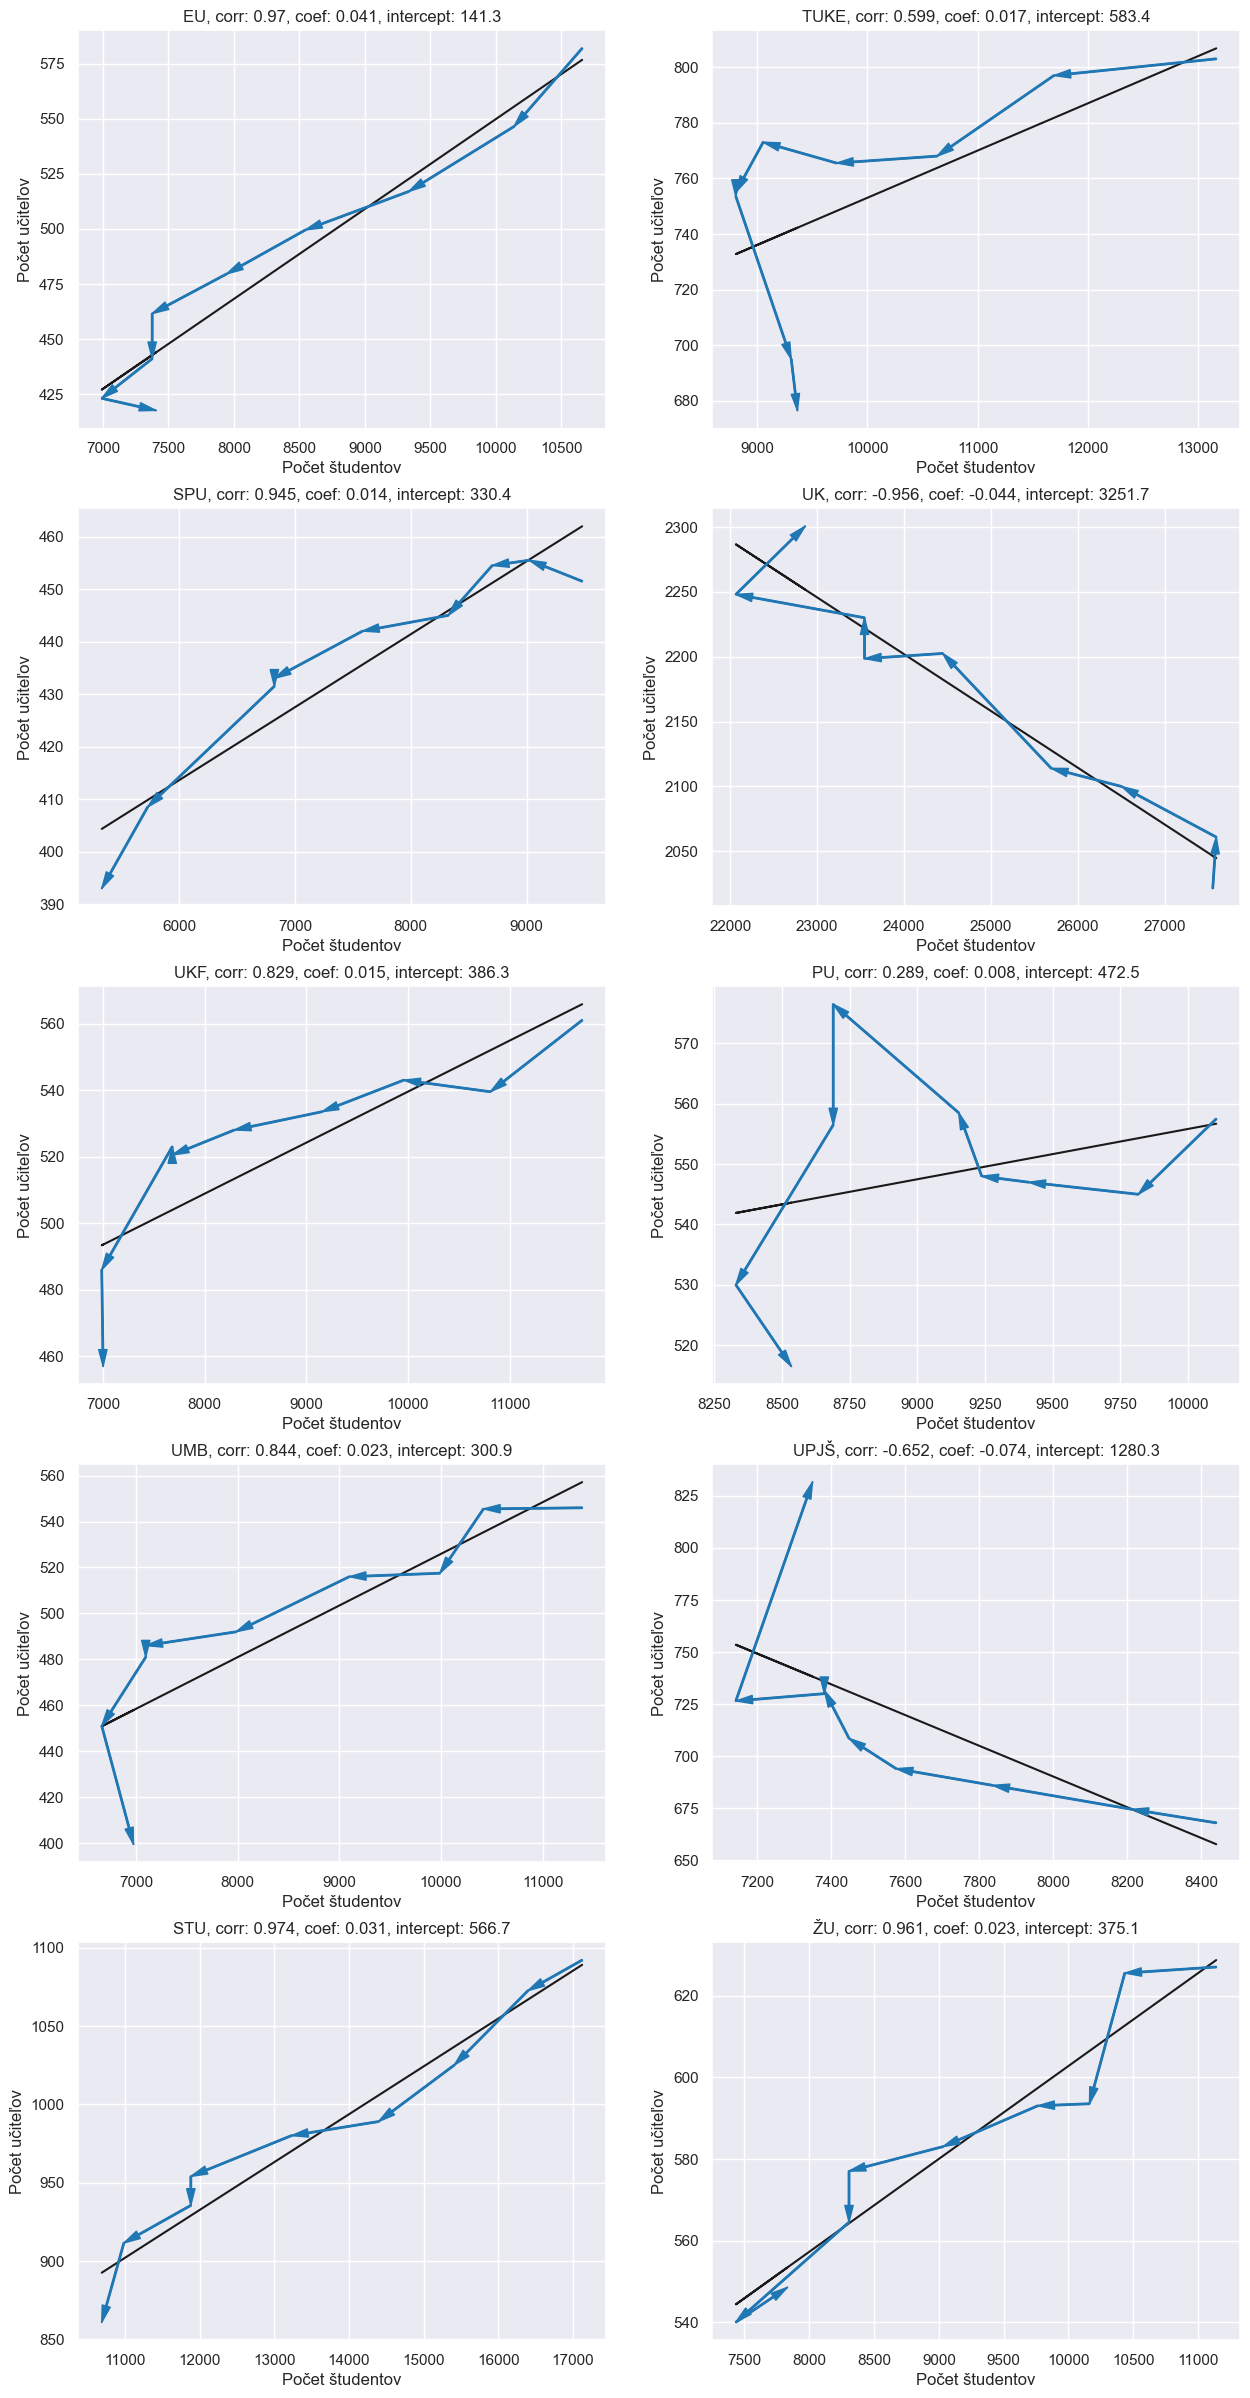

In [35]:
features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students', 'inflation_rate']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

students_teachers_data = []

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['students']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Počet učiteľov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    coef = round(model.coef_[0],3)
    intercept = round(model.intercept_,1)
    corr = round(np.corrcoef(X_students_teachers.T[0],y_students_teachers)[0, 1], 3)
    ax[r][c].set_title(f'{uni}, corr: {corr}, coef: {coef}, intercept: {intercept}')
    students_teachers_data.append((uni, corr, coef, intercept))

students_teachers_df = pd.DataFrame(students_teachers_data, columns = ['uni', 'corr', 'coef', 'intercept'])
display(students_teachers_df)

,uni,corr,coef,intercept
0,EU,-0.162,-34.056,6638777.6
1,TUKE,-0.443,-395.624,16116746.6
2,SPU,-0.101,-31.286,7172425.7
3,UK,-0.880,-1998.746,78592059.2
4,UKF,-0.227,-53.299,7306853.7
5,PU,-0.873,-1385.619,19714188.1
6,UMB,-0.366,-64.330,6688924.7
7,UPJŠ,-0.816,-3742.692,37871976.4
8,STU,-0.640,-352.892,21390854.4
9,ŽU,-0.913,-673.518,15509328.7


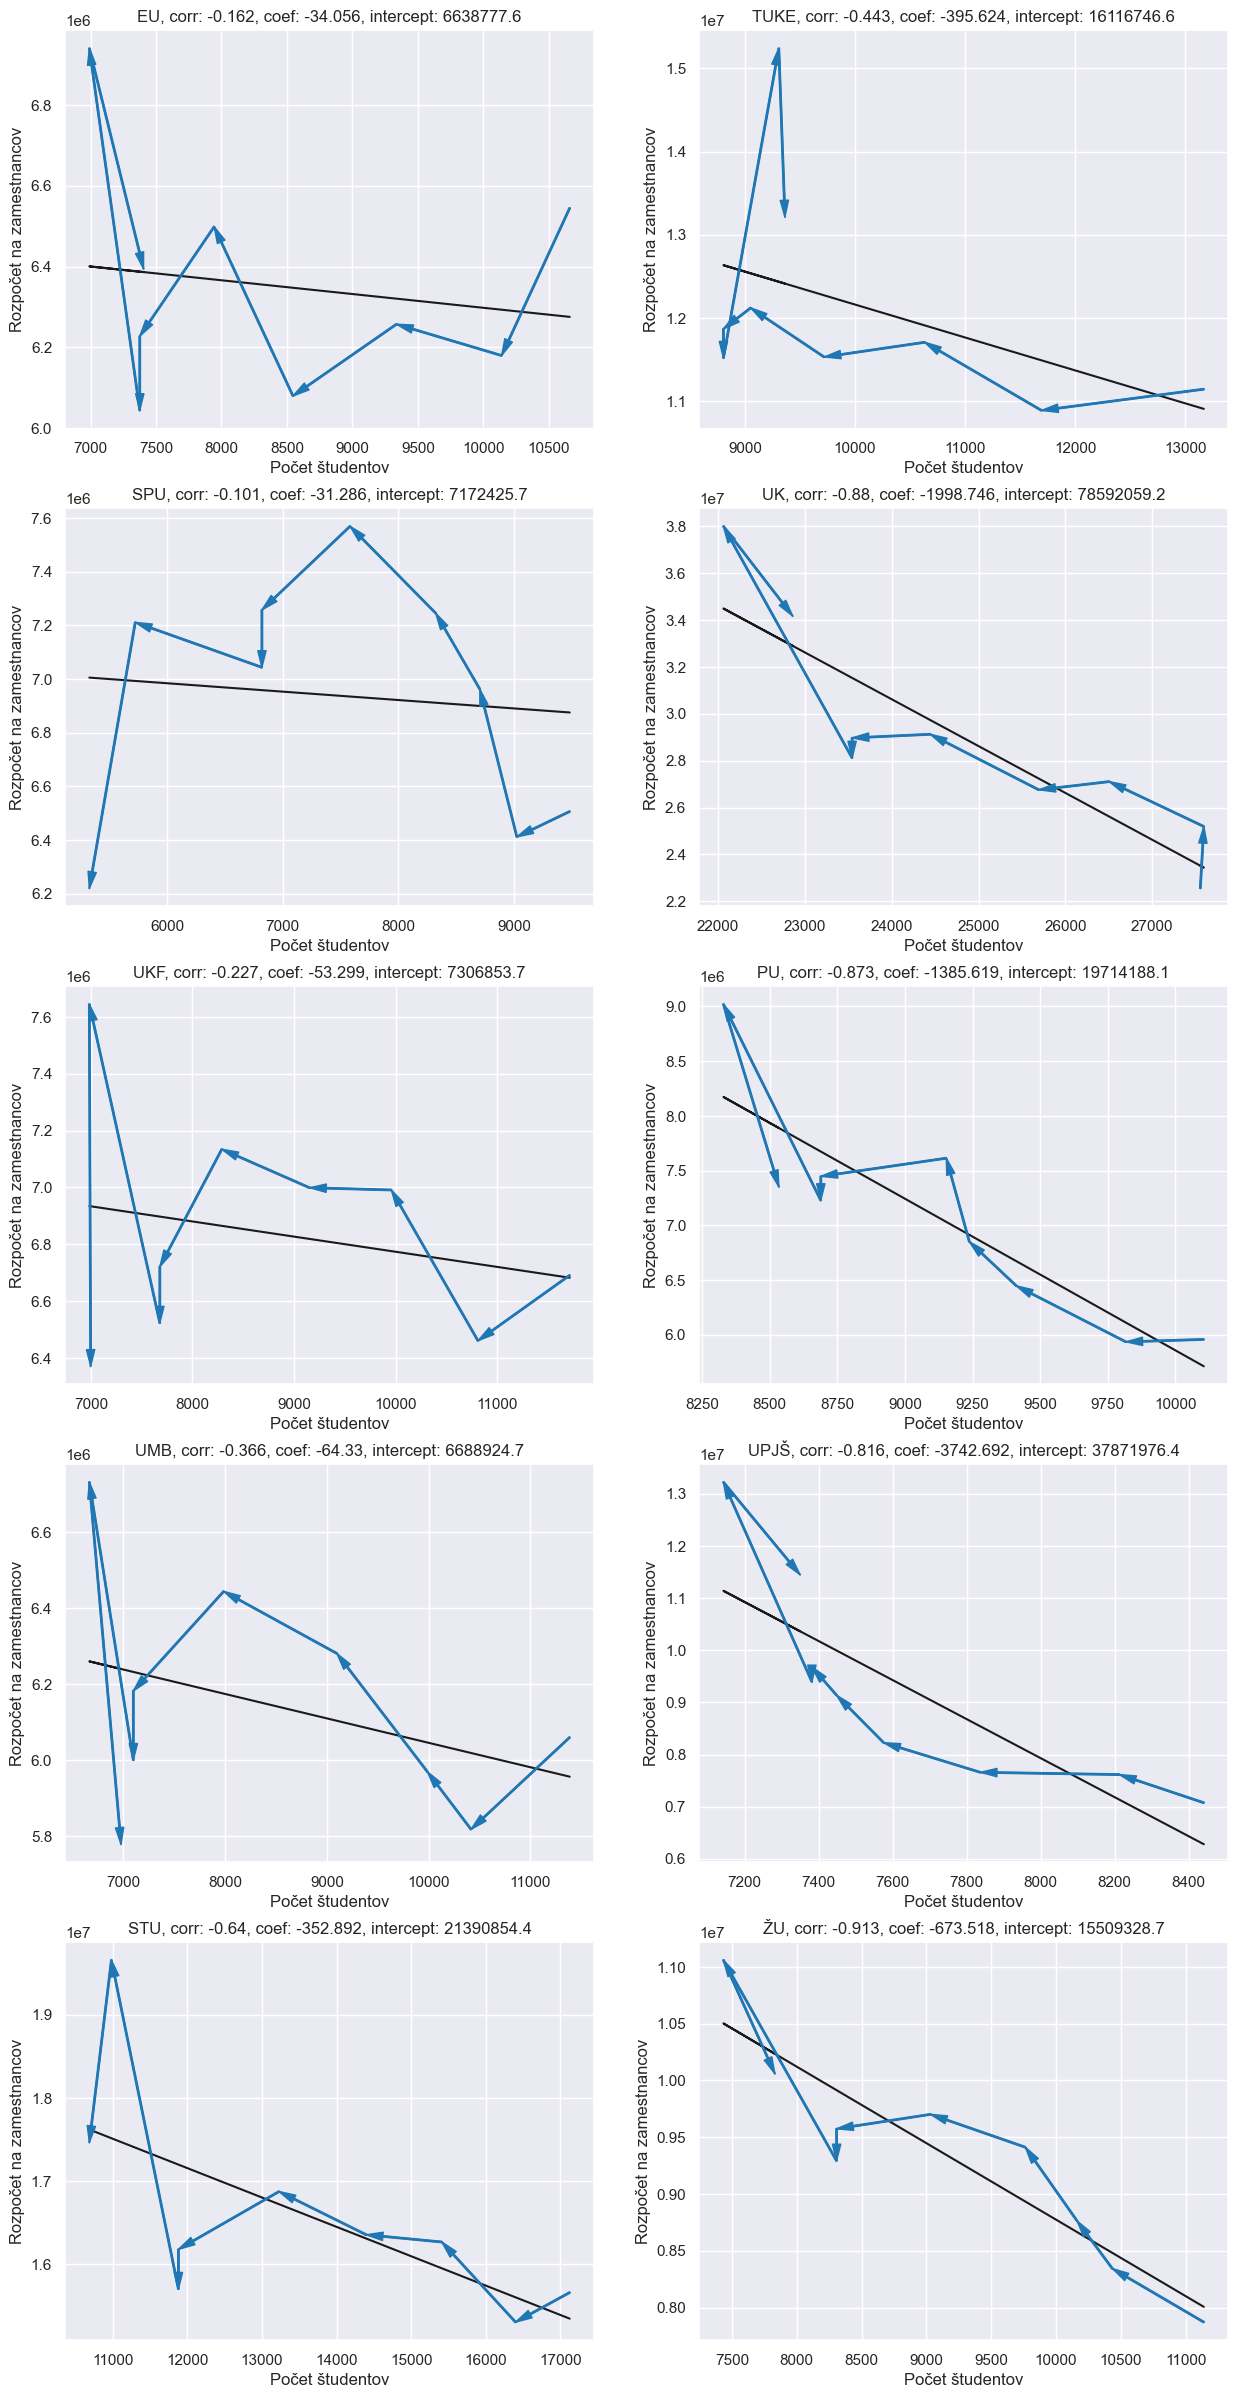

In [49]:
budget_raw['budget_wo_salary'] = (budget_raw['budget'] - budget_raw['salary_budget'])
budget_raw['budget_wo_salary_ia'] = budget_raw['budget_wo_salary'] / budget_raw['inflation_rate']
budget_raw['salary_budget_ia'] = budget_raw['salary_budget'] / budget_raw['inflation_rate']
budget_raw['students_budget_ia'] = budget_raw['students_budget'] / budget_raw['inflation_rate']

features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students_budget_ia', 'students', 'salary_budget_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

students_teachers_data = []

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['students']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['salary_budget_ia']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Rozpočet na zamestnancov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    coef = round(model.coef_[0],3)
    intercept = round(model.intercept_,1)
    corr = round(np.corrcoef(X_students_teachers.T[0],y_students_teachers)[0, 1], 3)
    ax[r][c].set_title(f'{uni}, corr: {corr}, coef: {coef}, intercept: {intercept}')
    students_teachers_data.append((uni, corr, coef, intercept))

students_teachers_df = pd.DataFrame(students_teachers_data, columns = ['uni', 'corr', 'coef', 'intercept'])
display(students_teachers_df)
    

## Some články data


,year,uni,budget,pub_07711,pub_07712
100,2014,UK,87178106.0,21.094113,30.217487
101,2014,UPJŠ,25039139.0,5.717271,8.952648
102,2014,PU,20109134.0,6.567317,3.961672
105,2014,UKF,20192249.0,6.600709,5.327423
106,2014,UMB,19212263.0,6.234505,4.158509
...,...,...,...,...,...
268,2022,STU,66757793.0,10.793734,12.152142
269,2022,TUKE,50203392.0,10.553171,10.979593
270,2022,ŽU,36249673.0,5.780330,5.752234
272,2022,EU,19910885.0,2.762610,1.857100


,uni,corr,coef,intercept
0,UK,0.771,0.0,15.4
1,UPJŠ,0.783,0.0,-1.6
2,PU,-0.544,-0.0,9.6
3,UKF,-0.546,-0.0,13.2
4,UMB,-0.309,-0.0,9.1
5,STU,-0.349,-0.0,15.2
6,TUKE,0.039,0.0,10.4
7,ŽU,0.923,0.0,-1.3
8,EU,-0.353,-0.0,12.1
9,SPU,-0.632,-0.0,9.4


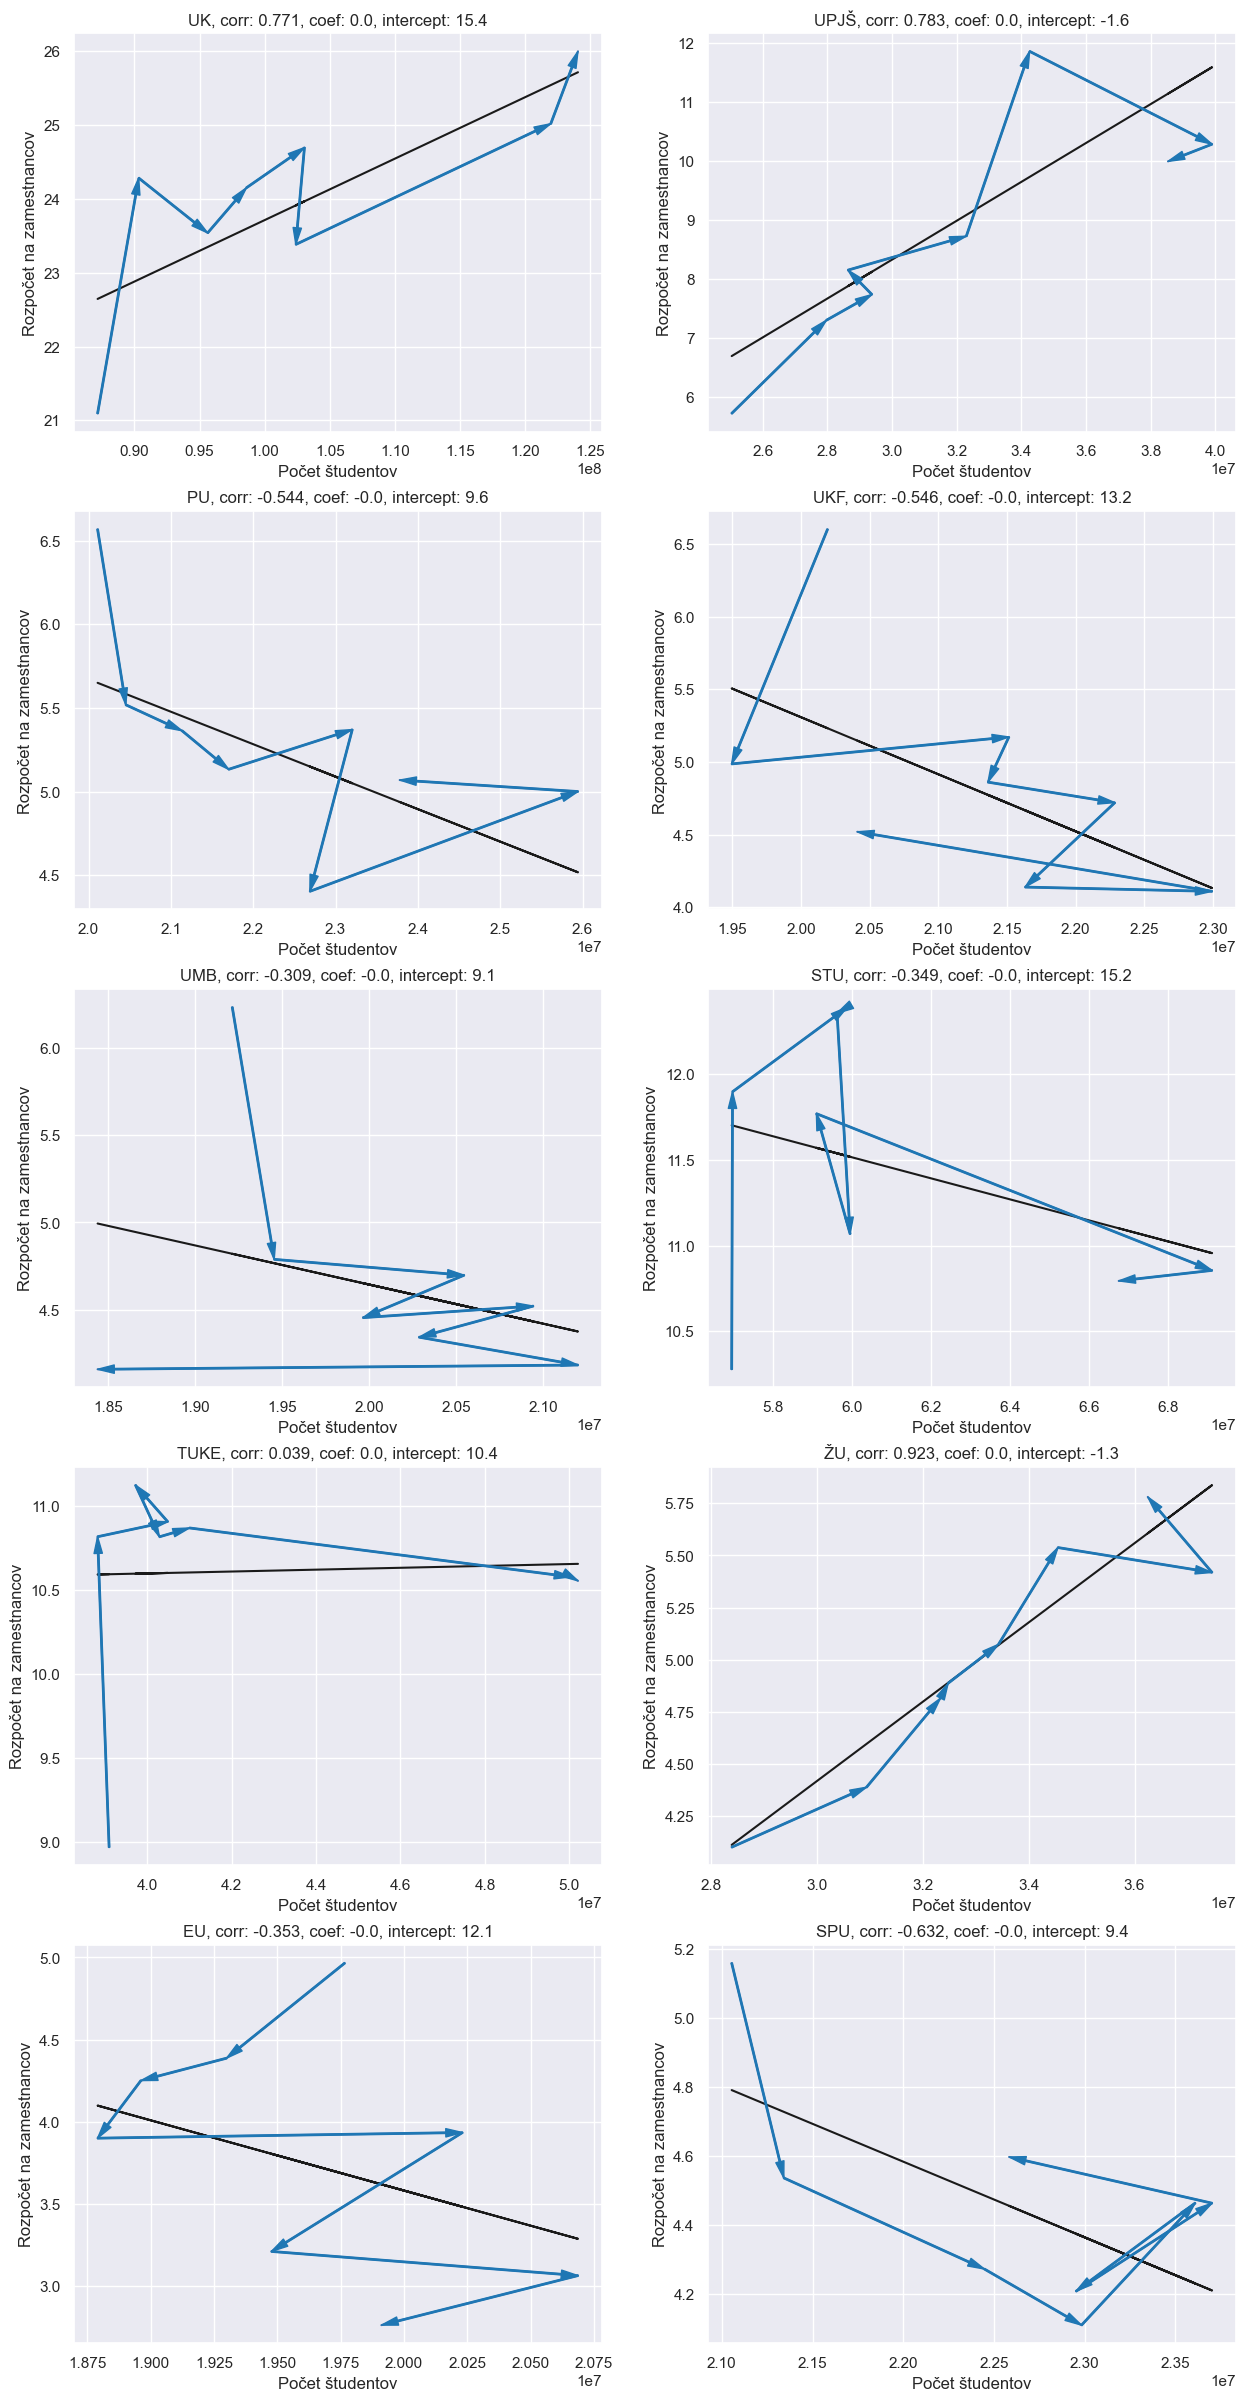

In [64]:
pub = budget_raw.query('year > 2013 and uni in @top10')[['year', 'uni', 'budget', 'pub_07711', 'pub_07712']]
display(pub)
pub_data = []

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

for i, uni in enumerate(pub['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    X_lr = pub.query('uni == @uni')[['budget']].values
    y_lr = pub.query('uni == @uni')['pub_07711']
    model.fit(X_lr, y_lr)
    model.coef_
    
    for t in range(len(y_lr)-1):
        ax[r][c].annotate('',xy=(X_lr[t+1][0], list(y_lr)[t+1]),xytext=(X_lr[t][0], list(y_lr)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_lr)
    ax[r][c].plot(X_lr, y_lr, '-') 
    ax[r][c].plot(X_lr, y_pred, color='k')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Rozpočet na zamestnancov')
    coef = round(model.coef_[0],3)
    intercept = round(model.intercept_,1)
    corr = round(np.corrcoef(X_lr.T[0],y_lr)[0, 1], 3)
    ax[r][c].set_title(f'{uni}, corr: {corr}, coef: {coef}, intercept: {intercept}')
    pub_data.append((uni, corr, coef, intercept))

pub_df = pd.DataFrame(pub_data, columns = ['uni', 'corr', 'coef', 'intercept'])
display(pub_df)
    

## Clustrovanie podľa typov vyučujúcich

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.cluster import KMeans

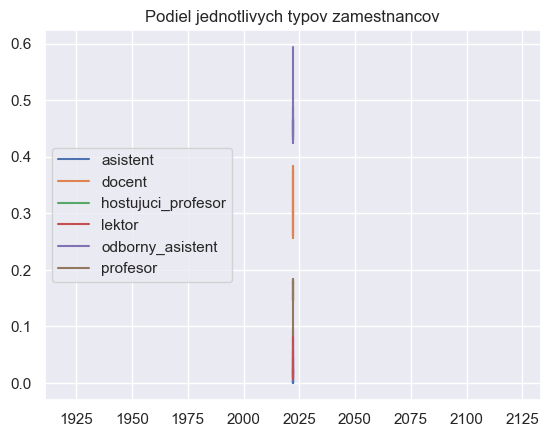

In [51]:
teachers_share = (teachers_types.query('year == 2022 and uni in @top10')
.iloc[:, :8]
.set_index(['year', 'uni']))

teachers_share['total'] = sum([teachers_share[col] for col in teachers_share.columns])


for col in teachers_share.columns:
    teachers_share[col] /= teachers_share['total']

teachers_share = teachers_share.iloc[:, :-1]

plt.plot(teachers_share.reset_index()['year'], teachers_share, label=teachers_share.columns)
plt.title('Podiel jednotlivych typov zamestnancov')
plt.legend(loc='center left')
plt.show()


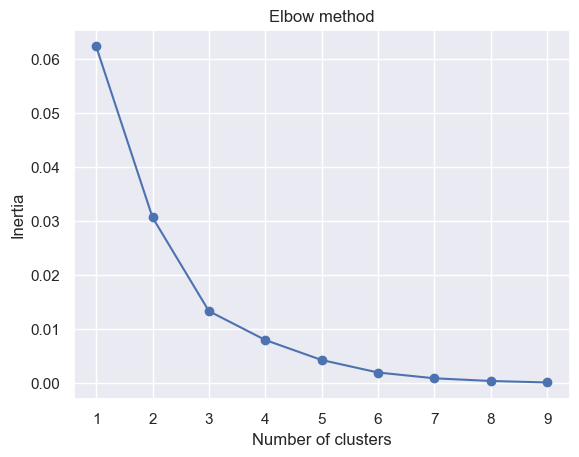

In [52]:
inertias = []


for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(teachers_share.values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# elbow metodou vyberame 3 clustre

In [53]:
# finalne rozdelime do clustrov

kmeans = KMeans(n_clusters=3)
kmeans.fit(teachers_share.values)
clusters = kmeans.predict(teachers_share.values)
teachers_share['cluster_id'] = clusters
teachers_share['cluster_id'] = teachers_share['cluster_id'].astype(str)
teachers_share

asistent    docent  hostujuci_profesor    lektor  odborny_asistent  \
year uni                                                                        
2022 EU    0.002395  0.299401                 0.0  0.019162          0.594012   
     PU    0.022265  0.336883                 0.0  0.056147          0.433688   
     SPU   0.000000  0.344784                 0.0  0.043257          0.428753   
     STU   0.004065  0.346690                 0.0  0.009292          0.465738   
     TUKE  0.000739  0.384331                 0.0  0.012565          0.424242   
     UK    0.081504  0.257118                 0.0  0.026081          0.488807   
     UKF   0.000000  0.376368                 0.0  0.006565          0.434354   
     UMB   0.002503  0.366708                 0.0  0.012516          0.468085   
     UPJŠ  0.046302  0.259170                 0.0  0.096212          0.453397   
     ŽU    0.016408  0.321787                 0.0  0.053783          0.446673   

           profesor cluster_id  
year uni                        
2022 EU    0.085030          1  
     PU    0.151016          0  
     SPU   0.183206          0  
     STU   0.174216          0  
     TUKE  0.178123          0  
     UK    0.146490          2  
     UKF   0.182713          0  
     UMB   0.150188          0  
     UPJŠ  0.144919          2  
     ŽU    0.161349          0

In [54]:
# clustre vizualizujeme pomocou PCA

X = teachers_share.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [55]:
# doplname data z pca do dataframeu

X_pca
df_pca = pd.DataFrame(X_pca, columns=['x1', 'x2'], index=teachers_share.index).reset_index()
teachers_share['x1'] = list(df_pca['x1'])
teachers_share['x2'] = list(df_pca['x2'])

teachers_share

asistent    docent  hostujuci_profesor    lektor  odborny_asistent  \
year uni                                                                        
2022 EU    0.002395  0.299401                 0.0  0.019162          0.594012   
     PU    0.022265  0.336883                 0.0  0.056147          0.433688   
     SPU   0.000000  0.344784                 0.0  0.043257          0.428753   
     STU   0.004065  0.346690                 0.0  0.009292          0.465738   
     TUKE  0.000739  0.384331                 0.0  0.012565          0.424242   
     UK    0.081504  0.257118                 0.0  0.026081          0.488807   
     UKF   0.000000  0.376368                 0.0  0.006565          0.434354   
     UMB   0.002503  0.366708                 0.0  0.012516          0.468085   
     UPJŠ  0.046302  0.259170                 0.0  0.096212          0.453397   
     ŽU    0.016408  0.321787                 0.0  0.053783          0.446673   

           profesor cluster_id        x1        x2  
year uni                                            
2022 EU    0.085030          1  2.043906  3.324113  
     PU    0.151016          0 -0.224779 -0.679573  
     SPU   0.183206          0 -1.280333 -0.802630  
     STU   0.174216          0 -1.225341  0.386031  
     TUKE  0.178123          0 -2.019155 -0.149016  
     UK    0.146490          2  3.072434 -0.573568  
     UKF   0.182713          0 -1.992569 -0.007541  
     UMB   0.150188          0 -1.126261  0.874414  
     UPJŠ  0.144919          2  2.970111 -1.752618  
     ŽU    0.161349          0 -0.218013 -0.619610

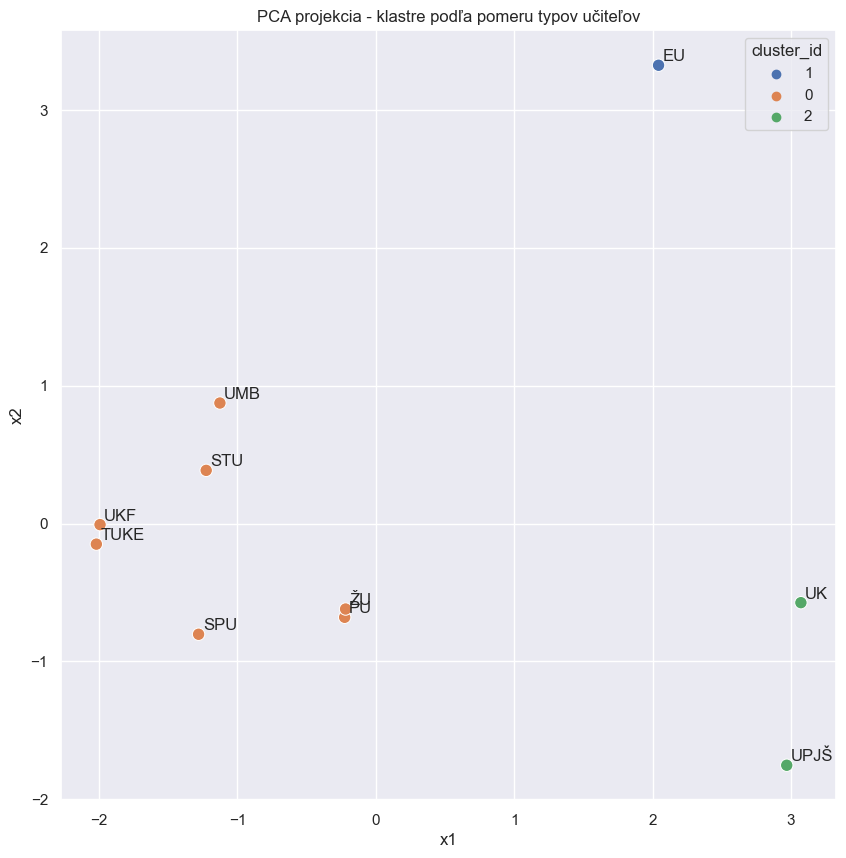

In [56]:
teachers_share['label'] = list(teachers_share.reset_index()['uni'].apply(lambda x: x if x in top10 else 'others'))
teachers_share
fig_pca, ax_pca = plt.subplots(figsize=(10, 10))
ax_pca.set_title('PCA projekcia - klastre podľa pomeru typov učiteľov')

sns.scatterplot(data=teachers_share, x="x1", y="x2", hue='cluster_id', s=80, ax=ax_pca)
for i, row in teachers_share.reset_index().iterrows():
    plt.annotate(row.uni, xy=(row.x1 + 0.03, row.x2 + 0.03))
plt.show()

In [57]:
display(teachers_share.query('cluster_id=="0"').drop(['hostujuci_profesor'], axis = 1))
display(teachers_share.query('cluster_id=="1"').drop(['hostujuci_profesor'], axis = 1))
display(teachers_share.query('cluster_id=="2"').drop(['hostujuci_profesor'], axis = 1))

asistent    docent    lektor  odborny_asistent  profesor  \
year uni                                                              
2022 PU    0.022265  0.336883  0.056147          0.433688  0.151016   
     SPU   0.000000  0.344784  0.043257          0.428753  0.183206   
     STU   0.004065  0.346690  0.009292          0.465738  0.174216   
     TUKE  0.000739  0.384331  0.012565          0.424242  0.178123   
     UKF   0.000000  0.376368  0.006565          0.434354  0.182713   
     UMB   0.002503  0.366708  0.012516          0.468085  0.150188   
     ŽU    0.016408  0.321787  0.053783          0.446673  0.161349   

          cluster_id        x1        x2 label  
year uni                                        
2022 PU            0 -0.224779 -0.679573    PU  
     SPU           0 -1.280333 -0.802630   SPU  
     STU           0 -1.225341  0.386031   STU  
     TUKE          0 -2.019155 -0.149016  TUKE  
     UKF           0 -1.992569 -0.007541   UKF  
     UMB           0 -1.126261  0.874414   UMB  
     ŽU            0 -0.218013 -0.619610    ŽU

,,asistent,docent,lektor,odborny_asistent,profesor,cluster_id,x1,x2,label
year,uni,,,,,,,,,
2022,EU,0.002395,0.299401,0.019162,0.594012,0.08503,1,2.043906,3.324113,EU


asistent    docent    lektor  odborny_asistent  profesor  \
year uni                                                              
2022 UK    0.081504  0.257118  0.026081          0.488807  0.146490   
     UPJŠ  0.046302  0.259170  0.096212          0.453397  0.144919   

          cluster_id        x1        x2 label  
year uni                                        
2022 UK            2  3.072434 -0.573568    UK  
     UPJŠ          2  2.970111 -1.752618  UPJŠ